# Лабораторная работа №2

## <span style="color:gray">Часть 1 - Метод дихотомии и метод Ньютона</span>

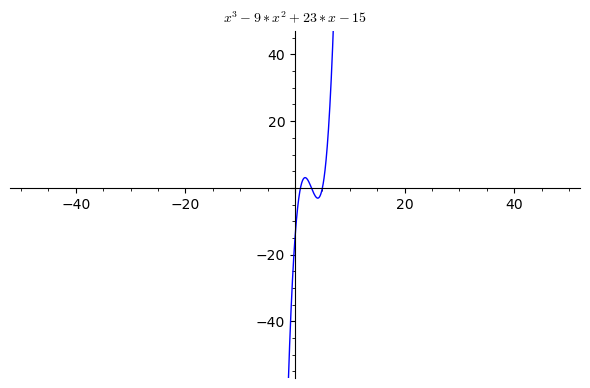

In [1]:
func = x**3 - 9*x**2 + 23*x - 15
EPS = 1e-5

plot.options["xmin"] = -50
plot.options["xmax"] = 50
plot.options["ymin"] = -55
plot.options["ymax"] = 45
plot(func, title=r"$x^3 - 9*x^2 + 23*x - 15$")

### ***1. Ньютон***

In [2]:
# Функция вычисляющая методом Ньютона точку пересечения с Ox
def newton(f, a, b, EPS = 1e-5):
    x1 = a
    x2 = (a + b) / 2
    
    df = f.derivative()
    while abs(x2 - x1) >= EPS:
        x1 = x2
        x2 = x1 - f(x=x1)/df(x=x1)

    return x1

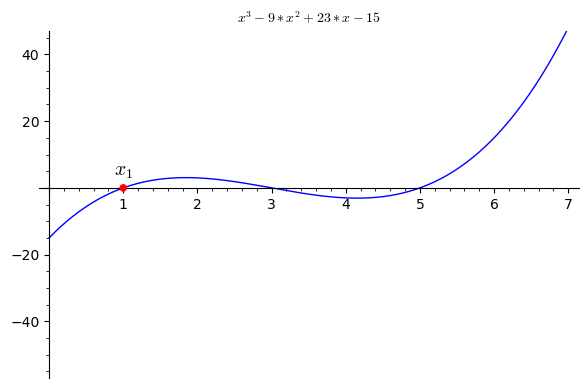

In [3]:
# Пример вычисления корня уравнения с точками a = 0.5 и b = 3
a = 0.5
b = 3

x_1 = newton(func, a, b)

p1 = plot(func,(0,7), title="${}$".format(func))
p1 += point((x_1, 0), color="red", size=30, zorder=20)
p1 += text(r"$x_1$", (x_1, 5), color="black", fontsize=14)

p1.show()

In [4]:
# Визуализация метода Ньютона

@interact
def newton_interact(a = (0, 4, 0.5), b = (2, 8, 0.5)):
    x1 = a
    x2 = (a + b) / 2

    p2 = plot(func, (0, 7))

    df = func.derivative()

    xmin = -1
    xmax = 8
    ymin = -5
    ymax = 7
    
    gr = []
    i = 0

    while abs(x2 - x1) >= 0.001:
        i = i + 1
        x1 = x2
        x2 = x1 - func(x=x1) / df(x=x1)
        l = df(x1)*(x - x1) + func(x=x1)
        gr.append(p2 + plot(l, color="red", xmin = xmin, ymin = ymin, ymax = ymax, xmax = xmax,  aspect_ratio = 1) 
                  + text((r"$Номер \ итерации={}$" + "\n" + r"$y={}$" + "\n" + r"$x_1={}, \ x_2={}$").format(i, latex(l), x1, x2), 
                            (4, 8.5), fontsize=10, color="black")) 

    graphics_array(gr, ncols = 2).show(figsize = [8, 12])


Interactive function <function newton_interact at 0x1c000b8b0> with 2 widgets
  a: FloatSlider(value=2.0, desc…

Результат полученный методом Ньютона совпадает с результатом solve для каждого корня при правильном выборе границ a, b

In [5]:
show(newton(func, 0, 2))
show(newton(func, 2, 4))
show(newton(func, 4.5, 7))
solve(func, x)

1

3

5.00000033021035

[x == 1, x == 5, x == 3]

## ***2. Дихотомия***

In [6]:
# Функция вычисляющая методом дихотомии точку пересечения с Ox
def dichotomy(f, l, r, EPS = 0.01):
    while abs(r - l) > EPS:
        mid = (l + r) / 2
        if f(x=l) * f(x=mid) > 0:
            l = mid
        elif f(x=r) * f(x=r) > 0:
            r = mid
    return n(l)

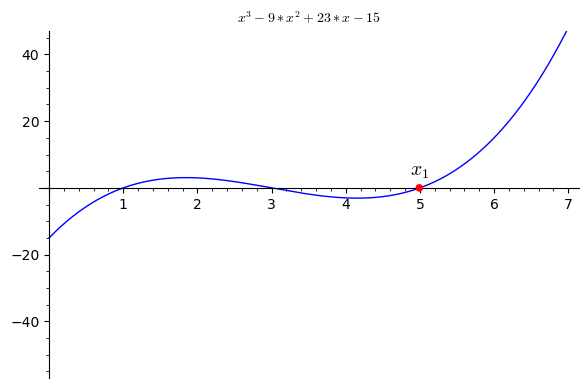

In [7]:
# Пример вычисления корня уравнения с точками a = 4 и b = 6
a = 4
b = 6

x_1 = dichotomy(func, a, b)

p1 = plot(func,(0,7), title="${}$".format(func))
p1 += point((x_1, 0), color="red", size=30, zorder=20)
p1 += text(r"$x_1$", (x_1, 5), color="black", fontsize=14)

p1.show()

In [8]:
# Визуализация метода дихотомии

@interact
def dichotomy_interact(a = (0, 4, 0.5), b = (2, 7, 0.5)):
    l = a
    r = b
    
    xmin = -1
    xmax = 8
    ymin = -5
    ymax = 7
    
    p2 = plot(func, (0, 7), ymin = ymin, ymax = ymax, xmax = xmax, xmin = xmin, aspect_ratio = 1)

    df = func.derivative()

    
    
    gr = []
    i = 0

    while abs(r - l) > 0.05:
        i = i + 1
        mid = (l + r) / 2
        if func(x = l) * func(x = mid) > 0:
            l = mid
        elif func(x = r) * func(x = r) > 0:
            r = mid
        
        gr.append(p2 + line([(l, 0), (r, 0)], color = 'red', thickness = 3) +
                  text((r"$Номер \ итерации={}$" + "\n" + r"$y={}$" + "\n" + r"$l={}, \ r={}$").format(i, latex(l), l, r), 
                            (4, 8.5), fontsize=10, color="black"))
    
    graphics_array(gr, ncols = 2).show(figsize = [10, 16])



Interactive function <function dichotomy_interact at 0x1c4fc5160> with 2 widgets
  a: FloatSlider(value=2.0, d…

Результат полученный методом дихотомии примерно совпадает (отличается на эпсилон) с результатом solve для каждого корня при правильном выборе границ a, b

In [9]:
show(dichotomy(func, 0, 2))
show(dichotomy(func, 2, 4))
show(dichotomy(func, 4.5, 7))
solve(func, x)

0.992187500000000

2.99218750000000

4.99804687500000

[x == 1, x == 5, x == 3]

## <span style="color:gray">Часть 2 - НОД</span>

In [10]:
# Вариант 5
R, (x, y) = PolynomialRing(QQ,'x, y').objgens()
f = 12*x**7 - 168*x**5 + 288*x**3 + 324*x
g = 4*x**6 - 28*x**4 + 20*x**3 + 48*x**2 - 60*x

In [11]:
# Функция вычисления коэффициентов тождества Безу и gcd(a,b)
def bezout(a, b):
    x, xx, y, yy = 1, 0, 0, 1
    while b:
        q, r = a // b, a % b
        a = b
        b = r
        x, xx = xx, x - xx*q
        y, yy = yy, y - yy*q
    return (x, y, a)

In [12]:
# Результат в виде трех элементов u, v, gcd(f,g) 
bez = bezout(f, g)
print("НОД(bezout) =", bez[2])

# Функция gcd
print("НОД(gcd) =", gcd(f, g))

# Тождество Безу f*u + v*g = gcd(f, g)
if f * bez[0] + g * bez[1] - bez[2] == 0:
    print("Получено верное тождество")

НОД(bezout) = -1420804/4563*x^3 + 1420804/1521*x
НОД(gcd) = x^3 - 3*x
Получено верное тождество


Полученный НОД равен результату функции gcd, умноженному на константу $\frac{\textbf{-1420804}}{\textbf{4563}}$
